# Assignment 4 - Introdução à Aprendizagem Automática

André Eusébio - 127600

Filipe Pereira - 131531

## Exercicio 1

1.

In [17]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

class EvolutionaryAlgo:
    def __init__(self):
        """
        Construct the Evolutionary Algorithm Object
        """
        self.size = [2, 4, 8, 12, 16]
        self.patterns = {}
        
    def create_bit_pattern(self):
        """
        Generate random bit patterns for each size in `self.size`.
        """

        for j in self.size:
            pattern = [random.randint(0, 1) for _ in range(j)]
            self.patterns[j] = pattern

    def random_search_pattern(self, iterations=30):
        """
        Perform multiple searches for each bit pattern and collect results.

        Parameters:
        - iterations (int): Number of times to search for each pattern.

        Returns:
        - tries_results (dict): Dictionary containing the number of tries for each pattern.
        - time_results (dict): Dictionary containing the time taken for each pattern.
        """
        
        tries_results = {j: [] for j in self.size}
        time_results = {j: [] for j in self.size}

        for j in self.patterns.keys():
            target_pattern = self.patterns[j]
            for _ in range(iterations):
                tries = 0
                start_time = time.time()
                found = False

                while not found:
                    tries += 1
                    pattern = [random.randint(0, 1) for _ in range(j)]
                    if pattern == target_pattern:
                        found = True

                end_time = time.time()
                tries_results[j].append(tries)
                time_results[j].append(end_time - start_time)

        return tries_results, time_results

    def fitness(self, correct_pattern, guessed_pattern):
        """
        Calculate the fitness of a guessed pattern.

        Parameters:
        - correct_pattern (list): The correct pattern to match.
        - guessed_pattern (list): The guessed pattern to evaluate.

        Returns:
        - fitness (float): The fitness of the guessed pattern.
        """
        
        matching_bits = sum(1 for a, b in zip(correct_pattern, guessed_pattern) if a == b)
        fitness = matching_bits / len(correct_pattern)
        return fitness
    

    def mutation_invert(self, pattern):
        """
        Invert a random bit in a pattern.

        Parameters:
        - pattern (list): The pattern to mutate.

        Returns:
        - mutated_pattern (list): The mutated pattern.
        """
        
        mutated_pattern = pattern.copy()
        index = random.randint(0, len(mutated_pattern) - 1)
        mutated_pattern[index] = 1 - mutated_pattern[index]

        return mutated_pattern

    def mutation_invert_cycle(self, size):
        """
        Perform a mutation search for a specific pattern size.

        Parameters:
        - size (int): The size of the pattern to mutate.
        """
        
        pattern = self.patterns[size]
        mutated_pattern = pattern.copy()
        index = random.randint(0, len(mutated_pattern) - 1)
        mutated_pattern[index] = 1 - mutated_pattern[index]

        i = 0
        best_fitness = self.fitness(pattern, mutated_pattern)
        fitness_history = [best_fitness]

        while best_fitness < 1 and i < 1000:
            i += 1
            mutated_pattern = self.mutation_invert(mutated_pattern)
            current_fitness = self.fitness(pattern, mutated_pattern)

            if current_fitness > best_fitness:
                best_fitness = current_fitness
                fitness_history.append(best_fitness)

        print(f"Original pattern: {pattern}")
        print(f"Mutated pattern:  {mutated_pattern}")
        print(f"Fitness: {best_fitness:.2f} after {i} iterations")

    def crossover(self, pattern1, pattern2):
        """
        Perform crossover between two patterns.

        Parameters:
        - pattern1 (list): The first pattern.
        - pattern2 (list): The second pattern.

        Returns:
        - new_pattern (list): The resulting pattern after crossover.
        """
        
        crossover_type = random.randint(0, 1)
        indx = random.randint(0, len(pattern1))

        if crossover_type == 0:
            new_pattern = pattern1[:indx] + pattern2[indx:]
        else:
            new_pattern = pattern2[:indx] + pattern1[indx:]

        return new_pattern

    def generate_population_mutation(self, n_samples=100, size=12):
        """
        Generate a population of guessed patterns. 30% will be the best patterns (with the best fitness)
        and the remaining 70% will be created by mutation using patterns of the best 30% patterns.

        Parameters:
        - n_samples (int): Number of samples to generate.
        - correct_pattern (list): The correct pattern to match.
        - size (int): The size of the patterns to generate.

        Returns:
        - new_population (list): The generated population of patterns.
        - best_fitness (float): The fitness of the best pattern in the population.
        """
        
        correct_pattern = self.patterns.get(size)
        population = []
        for _ in range(n_samples):
            guessed_pattern = [random.randint(0, 1) for _ in range(size)]
            guessed_pattern_fitness = round(self.fitness(correct_pattern, guessed_pattern), ndigits=3)
            population.append((guessed_pattern, guessed_pattern_fitness))

        population.sort(key=lambda x: x[1], reverse=True)
        best_patterns = population[:int(n_samples * 0.3)]

        remaining_patterns = []
        for _ in range(n_samples - len(best_patterns)):
            new_pattern = self.mutation_invert(
                random.choice(best_patterns)[0]
            )
            new_pattern_fitness = round(self.fitness(correct_pattern, new_pattern), ndigits=3)
            remaining_patterns.append((new_pattern, new_pattern_fitness))

        new_population = best_patterns + remaining_patterns
        new_population.sort(key=lambda x: x[1], reverse=True)
        best_fitness = new_population[0][1]

        return new_population, best_fitness

    def generate_population_crossover(self, n_samples=100, size=12):
        """
        Generate a population of guessed patterns. 30% will be the best patterns (with the best fitness)
        and the remaining 70% will be created by crossover using patterns of the best 30% patterns.

        Parameters:
        - n_samples (int): Number of samples to generate.
        - correct_pattern (list): The correct pattern to match.
        - size (int): The size of the patterns to generate.

        Returns:
        - new_population (list): The generated population of patterns.
        - best_fitness (float): The fitness of the best pattern in the population.
        """
        
        correct_pattern = self.patterns.get(size)
        population = []
        for _ in range(n_samples):
            guessed_pattern = [random.randint(0, 1) for _ in range(size)]
            guessed_pattern_fitness = round(self.fitness(correct_pattern, guessed_pattern), ndigits=3)
            population.append((guessed_pattern, guessed_pattern_fitness))

        population.sort(key=lambda x: x[1], reverse=True)
        best_patterns = population[:int(n_samples * 0.3)]

        remaining_patterns = []
        for _ in range(n_samples - len(best_patterns)):
            new_pattern = self.crossover(
                random.choice(best_patterns)[0], random.choice(best_patterns)[0]
            )
            new_pattern_fitness = round(self.fitness(correct_pattern, new_pattern), ndigits=3)
            remaining_patterns.append((new_pattern, new_pattern_fitness))

        new_population = best_patterns + remaining_patterns
        new_population.sort(key=lambda x: x[1], reverse=True)
        best_fitness = new_population[0][1]

        return new_population, best_fitness

    def plot_results(self, tries_results, time_results):
        """
        Plot box-plots for tries and time results.

        Parameters:
        - tries_results (dict): Dictionary containing the number of tries for each pattern.
        - time_results (dict): Dictionary containing the time taken for each pattern.
        """
        
        sizes = list(tries_results.keys())

        # Prepare data for plotting
        tries_data = [tries_results[size] for size in sizes]
        time_data = [time_results[size] for size in sizes]

        # Create box-plots for tries
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.boxplot(tries_data, labels=sizes, patch_artist=True, boxprops=dict(facecolor='skyblue'))
        plt.title("Number of Tries vs Pattern Size")
        plt.xlabel("Pattern Size (bits)")
        plt.ylabel("Number of Tries")

        # Create box-plots for time
        plt.subplot(1, 2, 2)
        plt.boxplot(time_data, labels=sizes, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
        plt.title("Time Taken vs Pattern Size")
        plt.xlabel("Pattern Size (bits)")
        plt.ylabel("Time Taken (seconds)")

        plt.tight_layout()
        plt.show()

a) e b)

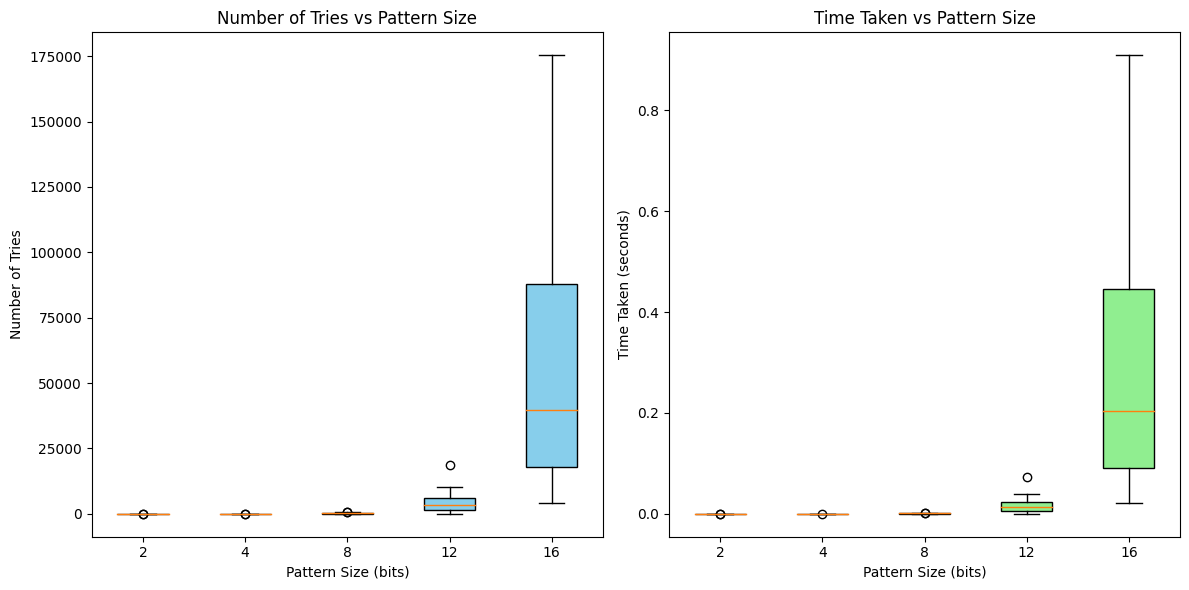

In [18]:
algo = EvolutionaryAlgo()
algo.create_bit_pattern()
tries_results, time_results = algo.random_search_pattern(iterations=30)
algo.plot_results(tries_results, time_results)

d)

In [19]:
algo.mutation_invert_cycle(16)

Original pattern: [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
Mutated pattern:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]
Fitness: 0.94 after 1000 iterations


## 2.


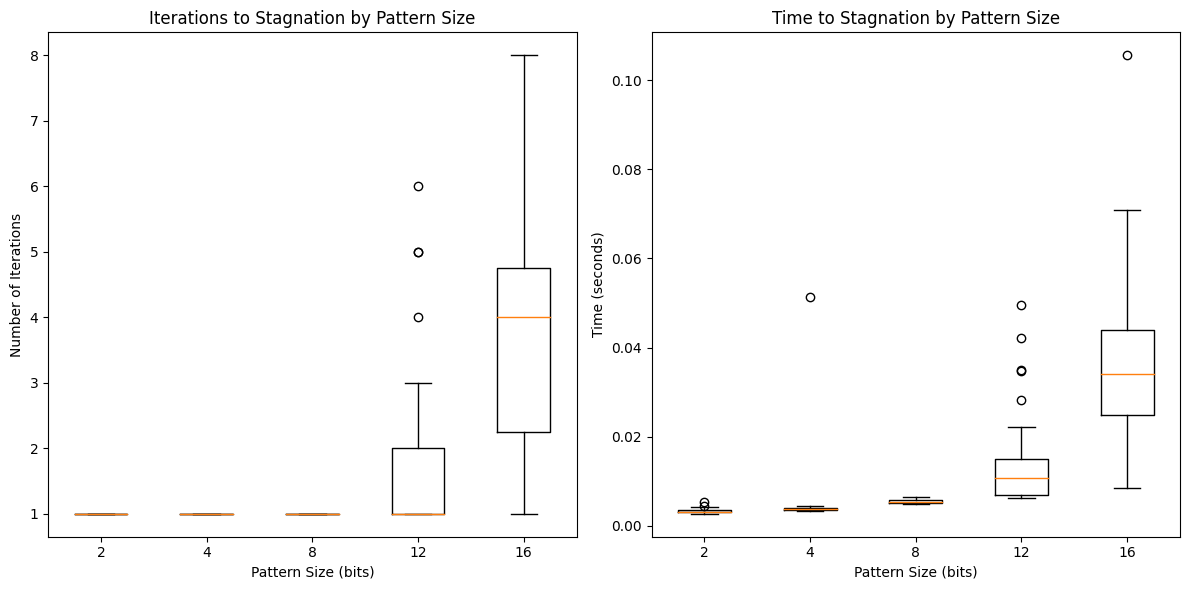

In [20]:
# Ensure bit patterns are initialized
algo = EvolutionaryAlgo()
algo.create_bit_pattern()

# Sizes to test
sizes = [2, 4, 8, 12, 16]

# Initialize results containers
iterations_results = {size: [] for size in sizes}
time_results = {size: [] for size in sizes}

# Perform the experiment
for i in sizes:
    for iteration in range(30):  # 30 runs for each size
        start_time = time.time()
        actual_fitness = 0.0  # Start with zero fitness
        max_fitness = 1.0

        iteration_count = 0
        while True:
            population, best_fitness = algo.generate_population_mutation(
                n_samples=1000,
                size=i
            )
            iteration_count += 1

            if best_fitness < actual_fitness:
                # Stagnation detected
                iterations_results[i].append(iteration_count)
                time_results[i].append(time.time() - start_time)
                break

            elif best_fitness == max_fitness:
                # Perfect match found
                iterations_results[i].append(iteration_count)
                time_results[i].append(time.time() - start_time)
                break

            else:
                actual_fitness = best_fitness

# Create boxplots for the results
plt.figure(figsize=(12, 6))

# Iterations to stagnation
plt.subplot(1, 2, 1)
plt.boxplot([iterations_results[size] for size in sizes], labels=sizes)
plt.title("Iterations to Stagnation by Pattern Size")
plt.xlabel("Pattern Size (bits)")
plt.ylabel("Number of Iterations")

# Time to stagnation
plt.subplot(1, 2, 2)
plt.boxplot([time_results[size] for size in sizes], labels=sizes)
plt.title("Time to Stagnation by Pattern Size")
plt.xlabel("Pattern Size (bits)")
plt.ylabel("Time (seconds)")

plt.tight_layout()
plt.show()

## 3.

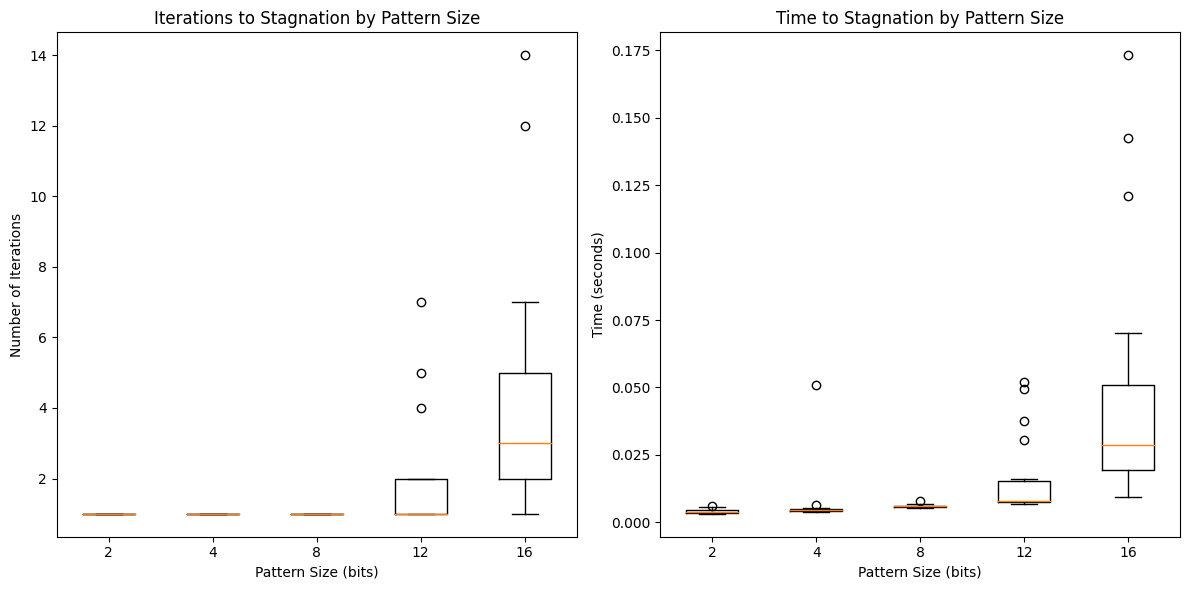

In [21]:
algo = EvolutionaryAlgo()
algo.create_bit_pattern()

sizes = [2, 4, 8, 12, 16]

iterations_results = {size: [] for size in sizes}
time_results = {size: [] for size in sizes}

for size in sizes:
    for iteration in range(30):
        start_time = time.time()
        actual_fitness = 0
        max_fitness = 1.0

        iteration_count = 0
        while True:
            population, best_fitness = algo.generate_population_crossover(
                n_samples=1000,
                size=size
            )
            iteration_count += 1

            if best_fitness < actual_fitness:
                # Stagnation detected
                iterations_results[size].append(iteration_count)
                time_results[size].append(time.time() - start_time)
                break

            elif best_fitness == max_fitness:
                # Perfect match found
                iterations_results[size].append(iteration_count)
                time_results[size].append(time.time() - start_time)
                break

            else:
                actual_fitness = best_fitness

# Create boxplots
plt.figure(figsize=(12, 6))

# Iterations boxplot
plt.subplot(1, 2, 1)
plt.boxplot([iterations_results[size] for size in sizes], labels=sizes)
plt.title("Iterations to Stagnation by Pattern Size")
plt.xlabel("Pattern Size (bits)")
plt.ylabel("Number of Iterations")

# Time boxplot
plt.subplot(1, 2, 2)
plt.boxplot([time_results[size] for size in sizes], labels=sizes)
plt.title("Time to Stagnation by Pattern Size")
plt.xlabel("Pattern Size (bits)")
plt.ylabel("Time (seconds)")

plt.tight_layout()
plt.show()

# Exercicio 2

In [22]:
class GeneticAlgorithmUnknownSize:
  def __init__(self, input: str):
    """
    Construct the object given a string pattern as input
    """
    
    self.pattern = list(input) #Lista com len unknown
    self.random_pattern = [random.randint(0, 1) for _ in ()]  #criar uma lista guess com len unknown

  def fitness(self, correct_pattern, guessed_pattern):
    """
    Calculate the fitness of a guessed pattern

    Parameters:
    - correct_pattern (list): The correct pattern to match.
    - guessed_pattern (list): The guessed pattern to evaluate.

    Returns:
    - fitness (float): The fitness of the guessed pattern.
    """

    min_length = min(len(correct_pattern), len(guessed_pattern))
    matching_bits = sum(1 for a, b in zip(correct_pattern[:min_length], guessed_pattern[:min_length]) if a == b)
    fitness = matching_bits / max(len(correct_pattern), len(guessed_pattern))
    return fitness

  def mutation(self, pattern):
    """
    Invert a random bit in a pattern.

    Parameters:
    - pattern (list): The pattern to mutate.

    Returns:
    - mutated_pattern (list): The mutated pattern.
    """

    mutated_pattern = pattern.copy()
    mutation_type = random.choice(["flip", "add", "remove"])

    if mutation_type == "flip" and mutated_pattern:
        index = random.randint(0, len(mutated_pattern) - 1)
        mutated_pattern[index] = 1 - mutated_pattern[index]
    elif mutation_type == "add":
        mutated_pattern.append(random.randint(0, 1))
    elif mutation_type == "remove" and mutated_pattern:
        index = random.randint(0, len(mutated_pattern) - 1)
        del mutated_pattern[index]

    return mutated_pattern

  def crossover(self, pattern1, pattern2):
    """
    Perform crossover between two patterns.

    Parameters:
    - pattern1 (list): The first pattern.
    - pattern2 (list): The second pattern.

    Returns:
    - new_pattern (list): The resulting pattern after crossover.
    """
    
    min_length = min(len(pattern1), len(pattern2))
    if min_length == 0:  # Handle edge cases where one pattern is empty
        return random.choice([pattern1, pattern2])

    # Select a random crossover point
    crossover_point = random.randint(1, min_length - 1)

    # Create new pattern
    new_pattern = pattern1[:crossover_point] + pattern2[crossover_point:]

    # Randomly add or remove bits for variable-length offspring
    if random.random() < 0.2:  # 20% chance to add or remove a bit
        mutation_type = random.choice(["add", "remove"])
        if mutation_type == "add":
            new_pattern.append(random.randint(0, 1))
        elif mutation_type == "remove" and new_pattern:
            del new_pattern[random.randint(0, len(new_pattern) - 1)]

    return new_pattern

# Exercicio 3

In [23]:
class GeneticAlgorithmDecimalPattern:
  
  def __init__(self):
      """
      Construct the geneticAlgorithm object
      """
      self.size = random.choice([2, 4, 8, 12, 16])
      self.pattern = [random.randint(0, 9) for _ in range(self.size)]

  def fitness(self, correct_pattern, guessed_pattern):
      """
      Calculate the fitness of a guessed pattern

      Parameters:
      - correct_pattern (list): The correct pattern to match.
      - guessed_pattern (list): The guessed pattern to evaluate.

      Returns:
      - fitness (float): The fitness of the guessed pattern.
      """

      min_length = min(len(correct_pattern), len(guessed_pattern))
      matching_bits = sum(1 for a, b in zip(correct_pattern[:min_length], guessed_pattern[:min_length]) if a == b)
      fitness = matching_bits / max(len(correct_pattern), len(guessed_pattern))
      return fitness

  def mutation(self, pattern):
        """
        Invert a random bit in a pattern.

        Parameters:
        - pattern (list): The pattern to mutate.

        Returns:
        - mutated_pattern (list): The mutated pattern.
        """

        mutated_pattern = pattern.copy()
        index = random.randint(0, len(mutated_pattern)) - 1
        mutated_pattern[index] = 9 - random.randint(0, 9)

        return mutated_pattern

  def crossover(self, pattern1, pattern2):
      """
        Perform crossover between two patterns.

      Parameters:
      - pattern1 (list): The first pattern.
      - pattern2 (list): The second pattern.

      Returns:
      - new_pattern (list): The resulting pattern after crossover.
      """

      crosssover_type = random.randint(0, 1)
      indx = random.randint(0, len(pattern1))

      if crosssover_type == 0:
        new_pattern = pattern1[:indx] + pattern2[indx:]
      else:
        new_pattern = pattern2[:indx] + pattern1[indx:]

      return new_pattern


# Exercicio 4

In [24]:
def robot_fitness_function(current_position, goal_position, maze):
    distance_to_goal = calculate_distance(current_position, goal_position)

    path_length = len(get_path_to_current_position())

    obstacle_penalty = count_obstacle_crossings()

    fitness = MAX_FITNESS - (distance_to_goal + path_length + obstacle_penalty)

    return fitness

def robot_mutation(current_position, maze):
    possible_moves = [
        (0, 1),   # Move right
        (0, -1),  # Move left
        (1, 0),   # Move down
        (-1, 0)   # Move up
    ]

    valid_moves = [
        move for move in possible_moves
        if is_valid_move(current_position, move, maze)
    ]

    return apply_move(current_position, random.choice(valid_moves))

def robot_crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child